Index(['Entity', 'Code', 'Year', 'Meningitis fatalities\n\n\n\n\n\n',
       'Dementia fatalities\n\n\n\n\n\n', 'Parkinson s fatalities\n\n\n\n\n\n',
       'Nutritional deficiency fatalities\n\n\n\n\n\n',
       'Malaria fatalities\n\n\n\n\n\n', 'Drowning fatalities\n\n\n\n\n\n',
       'Interpersonal violence fatalities\n\n\n\n\n\n',
       'Maternal disorder fatalities\n\n\n\n\n\n',
       'HIV/AIDS fatalities\n\n\n\n\n\n',
       'Drug disorder fatalities\n\n\n\n\n\n',
       'Tuberculosis fatalities\n\n\n\n\n\n',
       'Cardiovascular fatalities\n\n\n\n\n\n',
       'Lower respiratory fatalities\n\n\n\n\n\n',
       'Neonatal disorder fatalities\n\n\n\n\n\n',
       'Alcohol disorder fatalities\n\n\n\n\n\n',
       'Self harm fatalities\n\n\n\n\n\n',
       'Forces of nature fatalities\n\n\n\n\n\n',
       'Diarrheal disease fatalities\n\n\n\n\n\n',
       'Environmental exposure fatalities\n\n\n\n\n\n',
       'Neoplasm fatalities\n\n\n\n\n\n', 'Conflict fatalities\n\n\n\n\n\n',

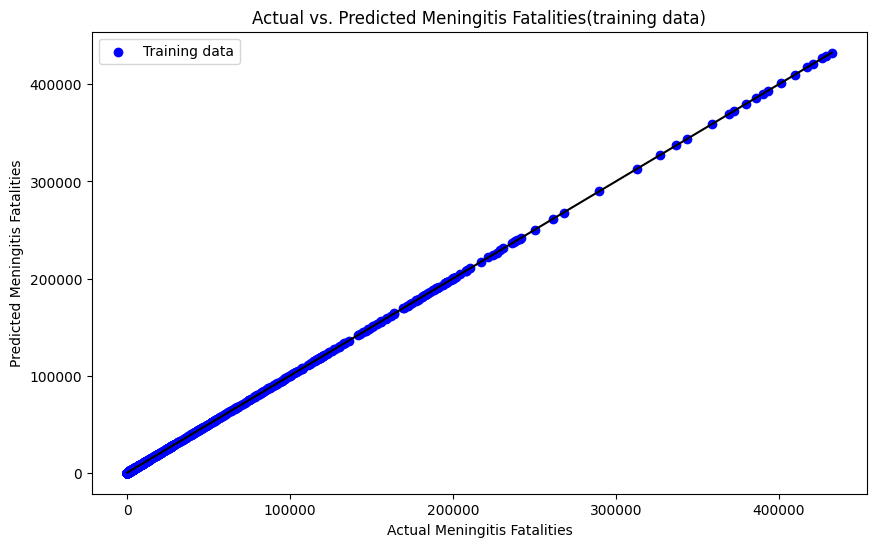

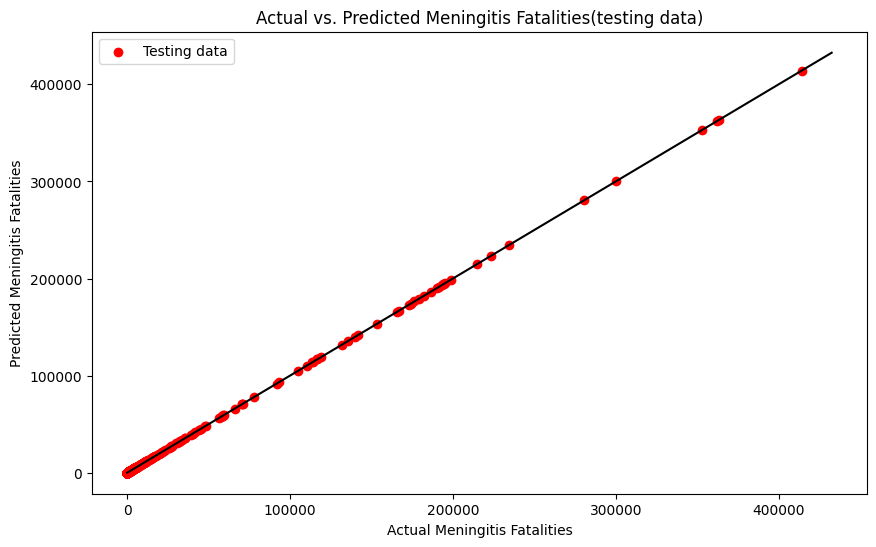

In [1]:
#Linear Regression
#import librabries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r"C:\Users\amisha Shetty\Documents\6th sem\ML\lab\project\5anual_death\Annual cause death numbers new.csv")
# Print column names
print(data.columns)
# Extracting features and target variable
X = data.drop(columns=["Entity", "Code", "Year"])
y = data["Meningitis fatalities\n\n\n\n\n\n"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the regressor
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("MSE score:", mse)
print("R^2 score:", r2)


# Plotting training and testing data
plt.figure(figsize=(10, 6))

# Plotting training data
plt.scatter(y_train, y_train_pred, color='blue', label='Training data')

# Plotting the line of best fit
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='black')

plt.title('Actual vs. Predicted Meningitis Fatalities(training data)')
plt.xlabel('Actual Meningitis Fatalities')
plt.ylabel('Predicted Meningitis Fatalities')
plt.legend()
plt.show()
# Plotting training and testing data
plt.figure(figsize=(10, 6))

# Plotting testing data
plt.scatter(y_test, y_test_pred, color='red', label='Testing data')

# Plotting the line of best fit
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='black')

plt.title('Actual vs. Predicted Meningitis Fatalities(testing data)')
plt.xlabel('Actual Meningitis Fatalities')
plt.ylabel('Predicted Meningitis Fatalities')
plt.legend()

plt.show()

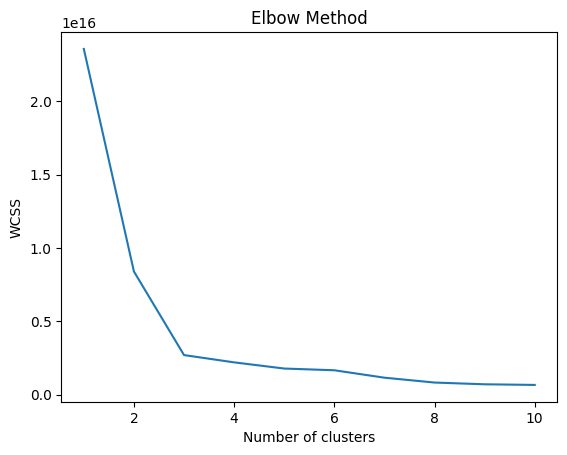

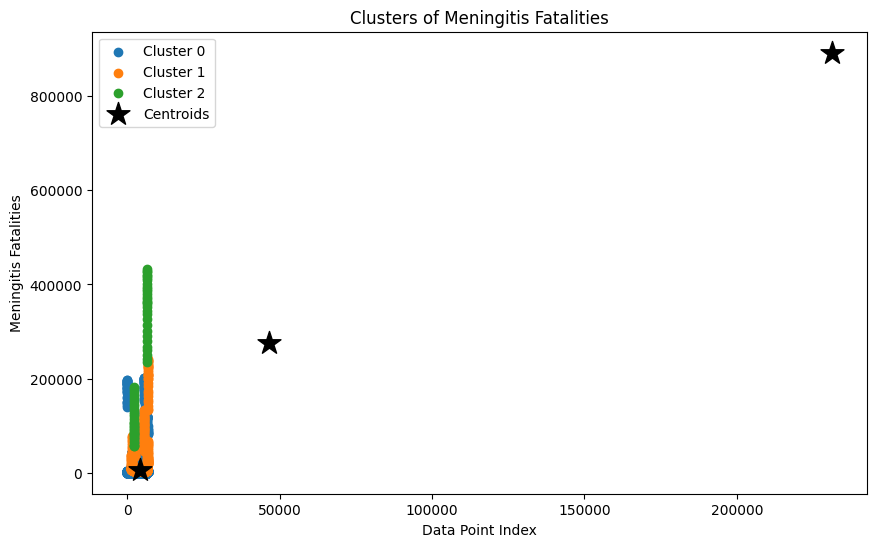

In [4]:
#KMeans Clustering
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r"C:\Users\amisha Shetty\Documents\6th sem\ML\lab\project\5anual_death\Annual cause death numbers new.csv")
# Extracting features
X = data.drop(columns=["Entity", "Code", "Year"])

# Implementing the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within Cluster Sum of Squares
plt.show()

# Based on the Elbow Method, we can choose the optimal number of clusters (let's say k=3)
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(X)

# Assigning each data point to a cluster
data['Cluster'] = kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(10, 6))

# Plotting each cluster separately
for cluster in range(k):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data.index, cluster_data['Meningitis fatalities\n\n\n\n\n\n'], label=f'Cluster {cluster}')
    
# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', marker='*', label='Centroids')

plt.title('Clusters of Meningitis Fatalities')
plt.xlabel('Data Point Index')
plt.ylabel('Meningitis Fatalities')
plt.legend()
plt.show()